In [1]:
#script_regression.py

import csv
import random
import math
import numpy as np

import regressionalgorithms as algs

import MLCourse.dataloader as dtl
import MLCourse.plotfcns as plotfcns
import time

def l2err(prediction,ytest):
    """ l2 error (i.e., root-mean-squared-error) """
    return np.linalg.norm(np.subtract(prediction, ytest))

def l1err(prediction,ytest):
    """ l1 error """
    return np.linalg.norm(np.subtract(prediction, ytest), ord=1)

def l2err_squared(prediction,ytest):
    """ l2 error squared """
    return np.square(np.linalg.norm(np.subtract(prediction, ytest)))

def geterror(predictions, ytest):
    # Can change this to other error values
    return l2err(predictions, ytest) / np.sqrt(ytest.shape[0])


if __name__ == '__main__':
    trainsize = 5000
    testsize = 5000
    numruns = 5

    regressionalgs = {
        #'Random': algs.Regressor,
        #'Mean': algs.MeanPredictor,
        #'FSLinearRegression': algs.FSLinearRegression,
        # 'RidgeLinearRegression': algs.RidgeLinearRegression,
        # 'KernelLinearRegression': algs.KernelLinearRegression,
        # 'LassoRegression': algs.LassoRegression,
         'StochasticLinearRegression': algs.StochasticLinearRegression,
        # 'MPLinearRegression': algs.MPLinearRegression,
        # 'BatchLinearRegression': algs.BatchLinearRegression
    }
    numalgs = len(regressionalgs)

    # Specify the name of the algorithm and an array of parameter values to try
    # if an algorithm is not include, will run with default parameters
    parameters = {
        'FSLinearRegression': [
            { 'features': [i for i in range(1, 20)] },
            { 'features': [i for i in range(0, 385)] },
        ],
        'RidgeLinearRegression': [
            { 'regwgt': 0.00 , 'features': [i for i in range(1, 20)]},
            { 'regwgt': 0.01 , 'features': [i for i in range(1, 20)]},
            { 'regwgt': 0.05 , 'features': [i for i in range(1, 20)]},
        ],
        'LassoRegression': [
            { 'regwgt': 0.00 , 'features': [i for i in range(1, 20)], 'tol':10},
            { 'regwgt': 0.01 , 'features': [i for i in range(1, 20)], 'tol':10},
            { 'regwgt': 0.05 , 'features': [i for i in range(1, 20)], 'tol':10},
        ],
        'StochasticLinearRegression': [
            { 'epochs': 1000,  'stepsize': 0.01},
            { 'epochs': 3243,  'stepsize': 0.01}
        ]
    }

    errors = {}
    for learnername in regressionalgs:
        # get the parameters to try for this learner
        # if none specified, then default to an array of 1 parameter setting: None
        params = parameters.get(learnername, [ None ])
        errors[learnername] = np.zeros((len(params), numruns))

    for r in range(numruns):
        trainset, testset = dtl.load_ctscan(trainsize,testsize)
        print(('Running on train={0} and test={1} samples for run {2}').format(trainset[0].shape[0], testset[0].shape[0], r))

        for learnername, Learner in regressionalgs.items():
            params = parameters.get(learnername, [ None ])
            for p in range(len(params)):
                start = time.time()
                learner = Learner(params[p])
                print ('Running learner = ' + learnername + ' on parameters ' + str(learner.getparams()))
                # Train model
                learner.learn(trainset[0], trainset[1])
                print(f'Training took {time.time() - start} s')
                # Test model
                predictions = learner.predict(testset[0])
                error = geterror(testset[1], predictions)
                print ('Error for ' + learnername + ': ' + str(error))
                errors[learnername][p, r] = error
                
                if learnername == 'BatchLinearRegression':
                    batch_cost = learner.cost
                    batch_time = learner.time

    for learnername in regressionalgs:
        params = parameters.get(learnername, [ None ])
        besterror = np.mean(errors[learnername][0, :])
        bestparams = 0
        for p in range(len(params)):
            aveerror = np.mean(errors[learnername][p, :])
            if aveerror < besterror:
                besterror = aveerror
                bestparams = p

        # Extract best parameters
        best = params[bestparams]
        print ('Best parameters for ' + learnername + ': ' + str(best))
        print ('Average error for ' + learnername + ': ' + str(besterror) + ' +- ' + str(1.96 * np.std(errors[learnername][bestparams, :]) / math.sqrt(numruns)))
        
        sample_error = np.std(errors[learnername], axis=1)/np.sqrt(numruns)
        print( f'Sample error for learner {learnername} is {sample_error}')
        print(errors)

Running on train=5000 and test=5000 samples for run 0
Running learner = StochasticLinearRegression on parameters {'epochs': 1000, 'stepsize': 0.01}
Training took 55.07393789291382 s
Error for StochasticLinearRegression: 8.548822135698803
Running learner = StochasticLinearRegression on parameters {'epochs': 3243, 'stepsize': 0.01}
Training took 184.85576677322388 s
Error for StochasticLinearRegression: 8.547643986654242
Running on train=5000 and test=5000 samples for run 1
Running learner = StochasticLinearRegression on parameters {'epochs': 1000, 'stepsize': 0.01}
Training took 83.84217619895935 s
Error for StochasticLinearRegression: 8.475636976752684
Running learner = StochasticLinearRegression on parameters {'epochs': 3243, 'stepsize': 0.01}
Training took 241.6754333972931 s
Error for StochasticLinearRegression: 8.472229340981702
Running on train=5000 and test=5000 samples for run 2
Running learner = StochasticLinearRegression on parameters {'epochs': 1000, 'stepsize': 0.01}
Trainin

NameError: name 'batch_time' is not defined

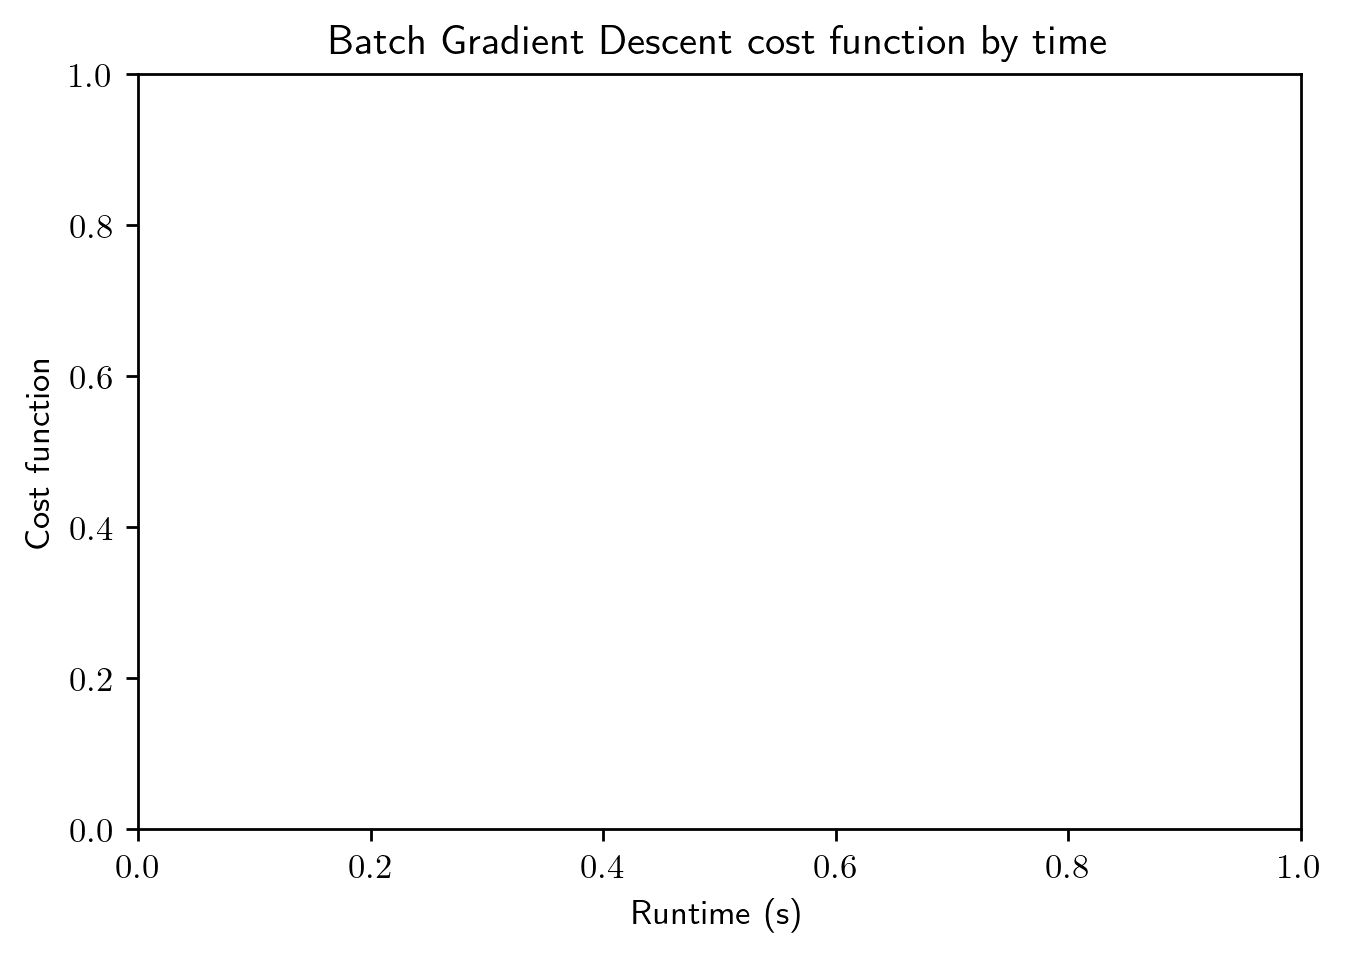

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as plt
mpl.rc('figure',dpi=250)
mpl.rc('text',usetex=True)

plt.title('Batch Gradient Descent cost function by time')
plt.xlabel('Runtime (s)')
plt.ylabel('Cost function')
plt.plot(batch_time, batch_cost)
plt.figure()


plt.title('Batch Gradient Descent cost function by iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost function')
plt.plot(np.arange(len(batch_time)), batch_cost)

print(len(batch_cost))